In [1]:
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# data filepath
data_dir = os.path.join(
    '../data',
    '01_01_2020',
)

In [3]:
# sanity check
assert os.path.exists(data_dir)

In [4]:

file_names = os.listdir(data_dir)
file_names_en = list(filter(lambda name: name[-2:] == 'en', file_names))
file_names_od = list(filter(lambda name: name[-2:] == 'od', file_names))
print(file_names_en)
print(file_names_od)

['test.en', 'train.en', 'val.en']
['test.od', 'train.od', 'val.od']


In [5]:
en_text, od_text = [], []

for file_name in file_names_en:
    with open(os.path.join(data_dir, file_name), 'r', encoding='utf-8') as f:
        en_text.extend(
            list(
                map(lambda x: x.strip(), f.readlines())
            )
        )

for file_name in file_names_od:
    with open(os.path.join(data_dir, file_name), 'r', encoding='utf-8') as f:
        od_text.extend(
            list(
                map(lambda x: x.strip(), f.readlines())
            )
        )




In [6]:
if len(en_text) != len(od_text):
    raise AssertionError

In [7]:
# number of tokens
en_text_lengths = list(map(lambda x: len(x.split()), en_text))
od_text_lengths = list(map(lambda x: len(x.split()), od_text))

In [8]:
print('max no of tokens in any en sample =', max(en_text_lengths))

max no of tokens in any en sample = 115


In [9]:
print('max no of tokens in any od sample =', max(od_text_lengths))

max no of tokens in any od sample = 109


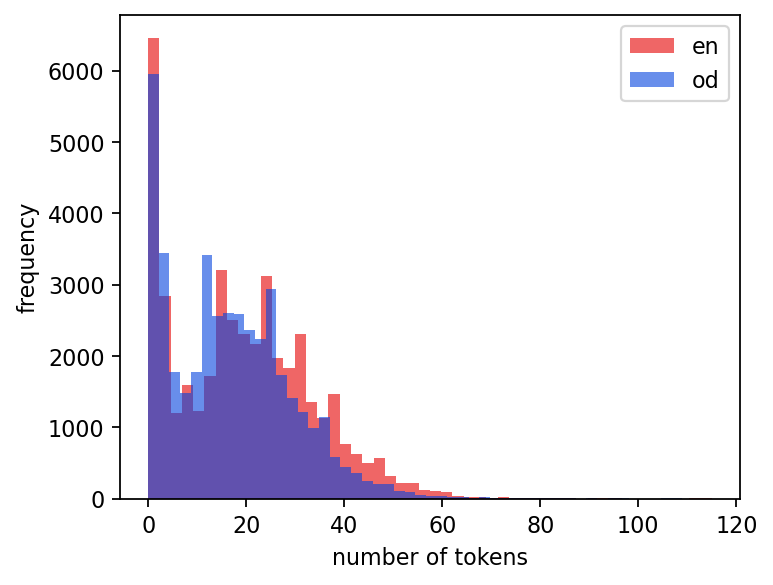

In [10]:
plt.figure(figsize=(5, 4), dpi=160)
plt.hist(en_text_lengths, bins=50, color='xkcd:red', alpha=0.6, label='en')
plt.hist(od_text_lengths, bins=50, color='xkcd:blue', alpha=0.6, label='od')
plt.xlabel('number of tokens')
plt.ylabel('frequency')
plt.legend()
plt.show()